In [1]:
#importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle

%matplotlib inline

In [2]:
#reading in X_matrix.txt

X = pd.read_csv('X_matrix.txt', sep=",", header=None) 

Performing Basic EDA on X_matrix.txt

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005
0,0.079626,0.031096,0.57758,0.079597,0.030656,0.37493,0.000057,0.000019,0.000101,0.000026,...,0.001328,0.000374,0.000717,0.000498,0.000212,0.001195,0.000976,0.001421,0.000764,0.001919
1,0.082924,0.031115,0.59131,0.082895,0.031045,0.57524,0.000227,0.000266,0.000379,0.000200,...,0.001677,0.000611,0.000394,0.000783,0.001300,0.000668,0.001501,0.001044,0.000389,0.001699
2,0.087933,0.031503,0.88682,0.087907,0.031370,0.86381,0.000048,0.000183,0.000175,0.000041,...,0.000900,0.000646,0.000824,0.000208,0.000489,0.000385,0.001275,0.000582,0.000665,0.002105
3,0.079373,0.031118,0.49833,0.079344,0.031020,0.49413,0.000084,0.000077,0.000140,0.000056,...,0.001278,0.000795,0.001149,0.000403,0.000238,0.000735,0.001175,0.001327,0.000448,0.001359
4,0.084620,0.031815,0.82388,0.084594,0.031625,0.82211,0.000016,0.000122,0.000034,0.000148,...,0.001030,0.000681,0.000135,0.000531,0.000544,0.000473,0.001614,0.001167,0.001174,0.002157


In [4]:
(X<0).sum().sum()

0

In [5]:
X.shape

(840, 3006)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Columns: 3006 entries, 0 to 3005
dtypes: float64(3006)
memory usage: 19.3 MB


In [7]:
X.isnull().sum().sum()

0

In [8]:
#reading in y_matrix.txt

y = pd.read_csv('y_matrix.txt', sep=",", header=None)

Performing Basic EDA on y_matrix.txt

In [9]:
y.head()

,0
0,1
1,1
2,1
3,1
4,1


In [10]:
y.shape

(840, 1)

In [11]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 1 columns):
0    840 non-null int64
dtypes: int64(1)
memory usage: 6.6 KB


In [12]:
y.isnull().sum()

0    0
dtype: int64

In [13]:
y[0].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
#reading in X_matrix_test_1.txt

Xt1 = pd.read_csv('X_matrix_test_1.txt', sep=",", header=None)

Performing Basic EDA on X_matrix_test_1.txt

In [15]:
Xt1.head()

,0,1,2,3,4,5,6,7,8,9,...,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005
0,0.076220,0.031312,0.42298,0.076179,0.031242,0.33418,0.000292,0.000240,0.000290,0.000378,...,0.000713,0.000362,0.000383,0.000699,0.000613,0.001588,0.000890,0.001951,0.001576,0.001595
1,0.077883,0.031565,0.81852,0.077838,0.031282,0.48617,0.000065,0.000202,0.000130,0.000137,...,0.000930,0.000855,0.000551,0.000769,0.000356,0.001536,0.000576,0.001601,0.001343,0.001221
2,0.076857,0.031371,0.66444,0.076830,0.031354,0.46230,0.000677,0.000511,0.000667,0.000614,...,0.000182,0.000216,0.000502,0.000102,0.000615,0.001045,0.000965,0.001524,0.001153,0.001753
3,0.078766,0.031355,0.42712,0.078717,0.031040,0.40293,0.000476,0.000452,0.000466,0.000455,...,0.000528,0.000365,0.000746,0.000396,0.000829,0.002125,0.000296,0.001386,0.001835,0.001543
4,0.065696,0.032124,0.40324,0.065650,0.032095,0.40001,0.000333,0.000282,0.000135,0.000009,...,0.000735,0.000626,0.000926,0.000615,0.000900,0.001347,0.000529,0.001971,0.001638,0.000737


In [16]:
Xt1.shape

(240, 3006)

In [17]:
Xt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Columns: 3006 entries, 0 to 3005
dtypes: float64(3006)
memory usage: 5.5 MB


In [18]:
(Xt1<0).sum().sum()

0

In [19]:
Xt1.isnull().sum().sum()

0

In [20]:
#reading in X_matrix_test_2.txt

Xt2 = pd.read_csv('X_matrix_test_2.txt', sep=",", header=None)

Performing Basic EDA on X_matrix_test_2

In [21]:
Xt2.head()

,0,1,2,3,4,5,6,7,8,9,...,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005
0,0.083963,0.031088,1.05810,0.083923,0.030901,1.00710,0.000255,0.000289,0.000066,0.000180,...,0.000098,0.000635,0.000670,0.000708,0.000977,0.000319,0.000385,0.001202,0.000440,0.001291
1,0.085258,0.031786,0.66821,0.085222,0.031681,0.66076,0.000213,0.000140,0.000074,0.000225,...,0.000481,0.000115,0.000222,0.000888,0.000202,0.000400,0.000648,0.000642,0.000618,0.000521
2,0.085543,0.031572,1.22010,0.085504,0.031417,1.17320,0.000365,0.000363,0.000388,0.000341,...,0.000448,0.000728,0.000630,0.000315,0.001347,0.001486,0.001280,0.000730,0.000391,0.001288
3,0.084739,0.031418,0.83699,0.084709,0.031402,0.74660,0.000482,0.000408,0.000412,0.000448,...,0.001066,0.000705,0.000831,0.000390,0.001110,0.000650,0.000417,0.000253,0.000715,0.000591
4,0.084089,0.031869,0.80974,0.084043,0.031711,0.77515,0.000197,0.000127,0.000076,0.000190,...,0.000452,0.000573,0.000320,0.000086,0.001230,0.001394,0.000757,0.000659,0.000400,0.000452


In [22]:
Xt2.shape

(180, 3006)

In [23]:
Xt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 3006 entries, 0 to 3005
dtypes: float64(3006)
memory usage: 4.1 MB


In [24]:
(Xt2<0).sum().sum()

0

In [25]:
Xt2.isnull().sum().sum()

0

Performing PCA for Dimensionality Reduction

In [26]:
XPCA = PCA(n_components=10)
PCA_X = XPCA.fit_transform(X)

In [27]:
X_PCA = pd.DataFrame(data = PCA_X, columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10'])

In [28]:
X_PCA.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,-0.328637,-0.026774,0.006883,-0.094637,0.038285,0.100466,0.018227,-0.024077,0.009175,-0.020918
1,0.017000,-0.083204,-0.020697,0.053838,-0.066675,0.035133,-0.051917,0.065175,-0.018537,-0.025032
2,0.641821,-0.112697,0.094780,-0.080575,-0.041728,0.073848,0.036155,0.003119,0.029049,-0.058206
3,-0.127890,-0.131275,0.058416,-0.089836,-0.109937,0.026575,-0.000901,-0.036683,-0.034974,-0.014201
4,0.536252,-0.070644,0.057336,-0.012011,-0.062206,0.065727,0.064744,-0.016464,0.060274,0.012470


In [29]:
print('Explained variation per principal component: {}'.format(XPCA.explained_variance_ratio_)) 

Explained variation per principal component: [ 0.71373331  0.10901822  0.03166554  0.02703449  0.02168163  0.01678668
  0.01052781  0.00662     0.00646866  0.00449868]


In [30]:
print('The sum of the Explained variation of the principal components: {}'.format(sum(XPCA.explained_variance_ratio_))) 

The sum of the Explained variation of the principal components: 0.9480350140580801


Implementing the Multinomial Logistic Regression Model

In [31]:
#Splitting the dataset X into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.3, random_state=101)

In [32]:
#Using the scikit learn logistic regression classifier to build the multi-classification classifier.

lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
#Printing the intercepts

lr.intercept_

array([-0.73924662, -1.43627244, -1.52805002, -1.37527118])

In [34]:
#Printing the coefficients

lr.coef_

array([[-0.36155808, -2.4260867 ,  1.61388629, -0.1124442 , -3.92224851,
         9.84664438, -0.64447145,  0.35792359, -0.07573052, -0.09825311],
       [ 0.69845546,  1.8739704 , -5.13180369, -2.35058216, -0.34371038,
        -2.58916901,  0.44224509,  0.09424244,  0.39806578,  0.22476773],
       [-0.85835146, -3.14857144,  7.47319769,  3.58398345,  4.28449843,
        -3.93438817,  0.0379942 , -0.27161816,  0.05026012,  0.138091  ],
       [ 0.59162872,  3.50745647, -4.59798784, -1.45712779, -0.6369877 ,
        -3.26765124, -0.03299288, -0.3031831 , -0.31900295, -0.27258122]])

In [35]:
#Attaining the predictions on X_test

predictions = lr.predict(X_test)

In [36]:
predictions

array([4, 3, 1, 4, 1, 4, 4, 2, 3, 4, 1, 1, 4, 2, 1, 1, 2, 1, 1, 3, 3, 4, 1,
       2, 1, 2, 1, 1, 1, 1, 4, 3, 1, 1, 1, 4, 1, 3, 1, 1, 1, 3, 4, 4, 3, 1,
       1, 1, 4, 2, 3, 1, 4, 3, 3, 4, 2, 4, 4, 3, 2, 1, 4, 3, 4, 1, 1, 1, 3,
       3, 4, 3, 4, 4, 4, 4, 3, 1, 1, 1, 2, 2, 1, 4, 1, 3, 3, 2, 1, 4, 4, 3,
       1, 1, 1, 2, 1, 1, 1, 3, 4, 3, 3, 1, 1, 1, 4, 1, 1, 3, 3, 1, 2, 3, 4,
       4, 3, 4, 1, 4, 1, 1, 1, 4, 4, 1, 3, 1, 1, 1, 4, 1, 4, 2, 2, 2, 1, 4,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 3, 3, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 3, 1, 2, 1, 1, 3, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 2, 3, 4, 4, 3,
       1, 1, 1, 4, 3, 4, 4, 1, 1, 4, 1, 4, 1, 3, 1, 1, 4, 1, 1, 1, 3, 1, 3,
       1, 4, 1, 3, 1, 1, 3, 2, 4, 3, 1, 4, 2, 1, 3, 1, 1, 1, 3, 1, 3, 4, 4,
       4, 4, 2, 3, 1, 4, 1, 4, 1, 1, 1, 1, 1, 3, 4, 4, 3, 4, 1, 3, 4, 1], dtype=int64)

In [37]:
#Evaluating the Performance of the Classifer with a Confusion Matrix

print(confusion_matrix(y_test,predictions))

[[101   0   0   0]
 [  4  14   0  37]
 [  1   0  49   0]
 [  7   7   0  32]]


In [38]:
#Evaluating the Performance of the Classifer with a Classification Report

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.89      1.00      0.94       101
          2       0.67      0.25      0.37        55
          3       1.00      0.98      0.99        50
          4       0.46      0.70      0.56        46

avg / total       0.79      0.78      0.76       252



In [39]:
unique_elements, counts_elements = np.unique(predictions, return_counts=True)

In [40]:
#Printing the Unique Elements and the Element count of the Predictions

np.array((unique_elements, counts_elements))

array([[  1,   2,   3,   4],
       [113,  21,  49,  69]], dtype=int64)

In [41]:
#Retrieving the Probabilities of y_test

probs = lr.predict_proba(X_test)

In [42]:
probs

array([[ 0.28737299,  0.28288942,  0.12480311,  0.30493448],
       [ 0.2286369 ,  0.0922157 ,  0.58378839,  0.09535901],
       [ 0.59027928,  0.11701381,  0.20748174,  0.08522517],
       ..., 
       [ 0.14530669,  0.12441039,  0.57747434,  0.15280859],
       [ 0.17352514,  0.31479138,  0.08321744,  0.42846604],
       [ 0.50978054,  0.22146796,  0.11376836,  0.15498314]])

In [43]:
probs.shape

(252, 4)

ROC Curve Plotting and AUC computing

In [44]:
#Label Binarizing y_test for ROC MultiCurve Plotting and AUC computing

y_test = label_binarize(y_test, classes=[1,2,3,4])

In [45]:
n_classes = 4

In [46]:
#FPR, TPR & AUC Computation & Consolidation

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

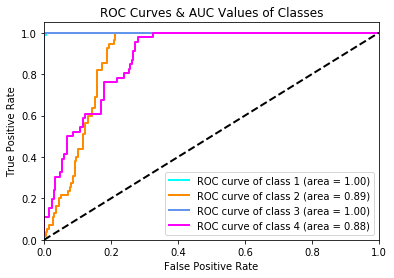

In [47]:
#Plotting ROC Curves and Printing AUC values for the 4 Classes

plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','magenta'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves & AUC Values of Classes')
plt.legend(loc="lower right")
plt.show()

Repeat PCA, Multinomial Logistic Regression Model & Prediction with X_matrix_test_1

In [48]:
Xt1PCA = PCA(n_components=10)
PCA_Xt1 = Xt1PCA.fit_transform(Xt1)

In [49]:
Xt1_PCA = pd.DataFrame(data = PCA_Xt1, columns = ['P1', 'P2', 'P3', 'P4', 'P5','P6', 'P7', 'P8', 'P9', 'P10'])

In [50]:
Xt1_PCA.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,-0.560957,0.077278,-0.007926,-0.099546,0.012764,-0.074609,-0.057827,-0.030158,0.035093,0.009684
1,-0.041421,0.158308,0.145967,-0.069599,-0.012833,-0.120710,0.031105,-0.057731,0.000439,0.008278
2,-0.104561,0.032463,0.047971,-0.068893,-0.053342,-0.110652,-0.075296,-0.022961,0.001174,-0.020107
3,-0.404731,0.082945,-0.100984,-0.033647,-0.044399,-0.115544,-0.036581,0.010080,-0.039960,-0.005641
4,-0.394151,0.009680,-0.086317,-0.028895,-0.057769,-0.041462,0.141257,-0.013084,-0.020267,-0.038236


In [51]:
print('Explained variation per principal component: {}'.format(Xt1PCA.explained_variance_ratio_))

Explained variation per principal component: [ 0.68030505  0.11388448  0.04929537  0.04310626  0.02218814  0.01776901
  0.01070605  0.00725976  0.00533582  0.0041221 ]


In [52]:
print('The sum of the Explained variation of the principal components: {}'.format(sum(Xt1PCA.explained_variance_ratio_))) 

The sum of the Explained variation of the principal components: 0.9539720525642074


In [53]:
predictions1 = lr.predict(Xt1_PCA)

In [54]:
predictions1

array([4, 3, 4, 4, 4, 4, 4, 1, 3, 1, 1, 3, 1, 1, 4, 1, 4, 3, 2, 4, 3, 4, 1,
       1, 2, 1, 3, 1, 3, 2, 1, 2, 1, 4, 1, 1, 1, 2, 2, 4, 1, 1, 4, 1, 1, 4,
       2, 4, 4, 1, 2, 3, 2, 1, 1, 1, 4, 3, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 4, 1, 1,
       1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 4, 3, 4, 3, 4,
       1, 4, 3, 3, 1, 2, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 4, 1, 3, 3,
       1, 2, 1, 4, 2, 1, 3, 4, 3, 3, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 4,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1,
       4, 4, 4, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [55]:
unique_elements, counts_elements = np.unique(predictions1, return_counts=True)

In [56]:
np.array((unique_elements, counts_elements))

array([[  1,   2,   3,   4],
       [114,  16,  59,  51]], dtype=int64)

Repeat PCA, Multinomial Logistic Regression Model & Prediction with X_matrix_test_2

In [57]:
Xt2PCA = PCA(n_components=10)
PCA_Xt2 = Xt2PCA.fit_transform(Xt2)

In [58]:
Xt2_PCA = pd.DataFrame(data = PCA_Xt2, columns = ['P1', 'P2', 'P3', 'P4', 'P5','P6', 'P7', 'P8', 'P9', 'P10'])

In [59]:
Xt2_PCA.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,0.848843,-0.155072,0.091146,-0.025192,0.100744,-0.077478,-0.006974,-0.000846,0.046288,-0.008105
1,0.127266,-0.149505,-0.002750,-0.034638,0.138321,-0.089134,0.001762,-0.041007,0.045520,-0.052194
2,1.122181,-0.119873,0.270043,0.256824,0.003317,-0.004040,-0.029121,0.018531,0.035257,0.019848
3,0.106326,0.147927,0.445149,0.176272,-0.040930,0.061339,-0.016660,-0.052030,0.051759,-0.056828
4,0.241807,0.006709,0.335074,-0.173769,0.134268,0.061122,0.039712,0.083406,-0.022997,0.012811


In [60]:
print('Explained variation per principal component: {}'.format(Xt2PCA.explained_variance_ratio_))

Explained variation per principal component: [ 0.6403244   0.15984819  0.08569553  0.03351109  0.01444255  0.01023997
  0.00689386  0.00544637  0.00393423  0.0030278 ]


In [61]:
print('The sum of the Explained variation of the principal components: {}'.format(sum(Xt2PCA.explained_variance_ratio_))) 

The sum of the Explained variation of the principal components: 0.963363982399936


In [62]:
predictions2 = lr.predict(Xt2_PCA)

In [63]:
predictions2

array([3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3, 4, 4, 3, 3, 2, 3, 4, 1,
       3, 2, 3, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 2, 4,
       3, 1, 3, 1, 1, 4, 1, 4, 1, 1, 1, 4, 2, 2, 3, 4, 3, 1, 4, 1, 3, 2, 3,
       1, 1, 4, 3, 4, 1, 4, 3, 3, 1, 4, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 3, 1, 4, 3, 3, 3, 3, 3, 1, 3, 1, 4, 2, 3, 3, 3, 3, 3,
       4, 3, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 3, 1, 1, 1, 1, 3, 3, 4, 2, 3, 3,
       4, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 4, 3, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1], dtype=int64)

In [64]:
unique_elements, counts_elements = np.unique(predictions2, return_counts=True)

In [65]:
np.array((unique_elements, counts_elements))

array([[ 1,  2,  3,  4],
       [88, 18, 49, 25]], dtype=int64)

Tabulating, Plotting the Predictions for X_matrix_test_1 using Index as the Time Variable and Saving files

In [66]:
Pred1 = pd.DataFrame(np.array([predictions1]).T)
Pred1.columns =['Predictions_1']
print(Pred1.head())
#Pred1.to_csv("Pred1.csv")

   Predictions_1
0              4
1              3
2              4
3              4
4              4


In [67]:
Pred1.reset_index(level=0, inplace=True)

AxesSubplot(0.125,0.125;0.775x0.755)


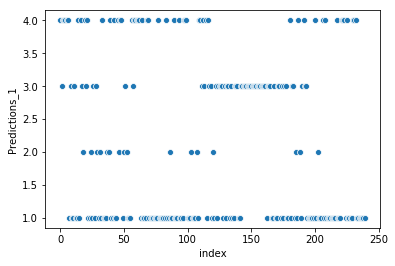

In [68]:
Pred1_Plot = sns.scatterplot(x="index", y="Predictions_1", data=Pred1)
print(Pred1_Plot)
#figure = Pred1_Plot.get_figure()    
#figure.savefig('Pred1_Plot.jpeg', dpi=400)

Tabulating, Plotting the Predictions for X_matrix_test_2 using Index as the Time Variable and Saving files

In [69]:
Pred2 = pd.DataFrame(np.array([predictions2]).T)
Pred2.columns =['Predictions_2']
print(Pred2.head())
#Pred2.to_csv("Pred2.csv")

   Predictions_2
0              3
1              3
2              3
3              3
4              3


In [70]:
Pred2.reset_index(level=0, inplace=True)

AxesSubplot(0.125,0.125;0.775x0.755)


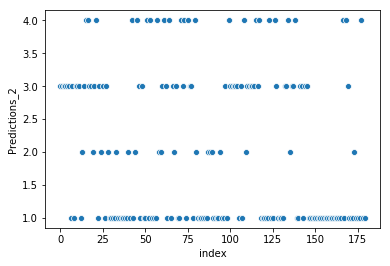

In [71]:
Pred2_Plot = sns.scatterplot(x="index", y="Predictions_2", data=Pred2)
print(Pred2_Plot)
#figure = Pred2_Plot.get_figure()    
#figure.savefig('Pred2_Plot.jpeg', dpi=400)